<a href="https://colab.research.google.com/github/xanimsgrv/BDA_project/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv("/content/drive/MyDrive/heart_attack_prediction_indonesia.csv")
data.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [54]:
print(data.isnull().sum())

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


# New Section

In [55]:
print(data.duplicated().sum())

0


In [56]:
print(data.dtypes)
print(data.nunique())

age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

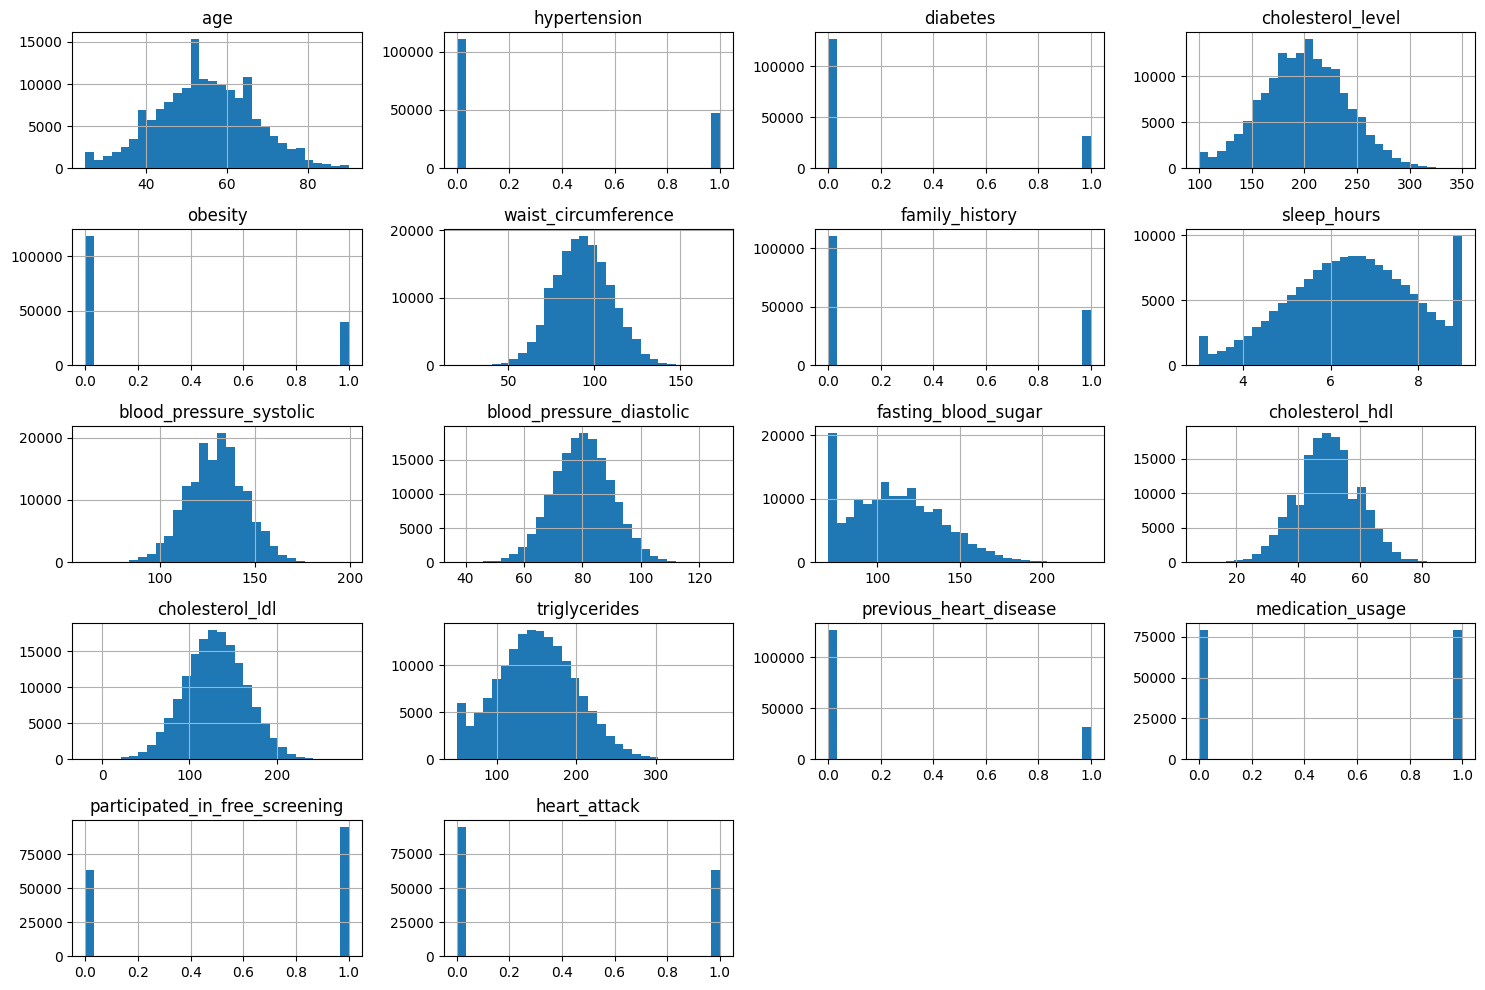

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot all numeric column distributions
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

🔍 Dataset shape: (158355, 28)

📌 Missing Values Per Column:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results         

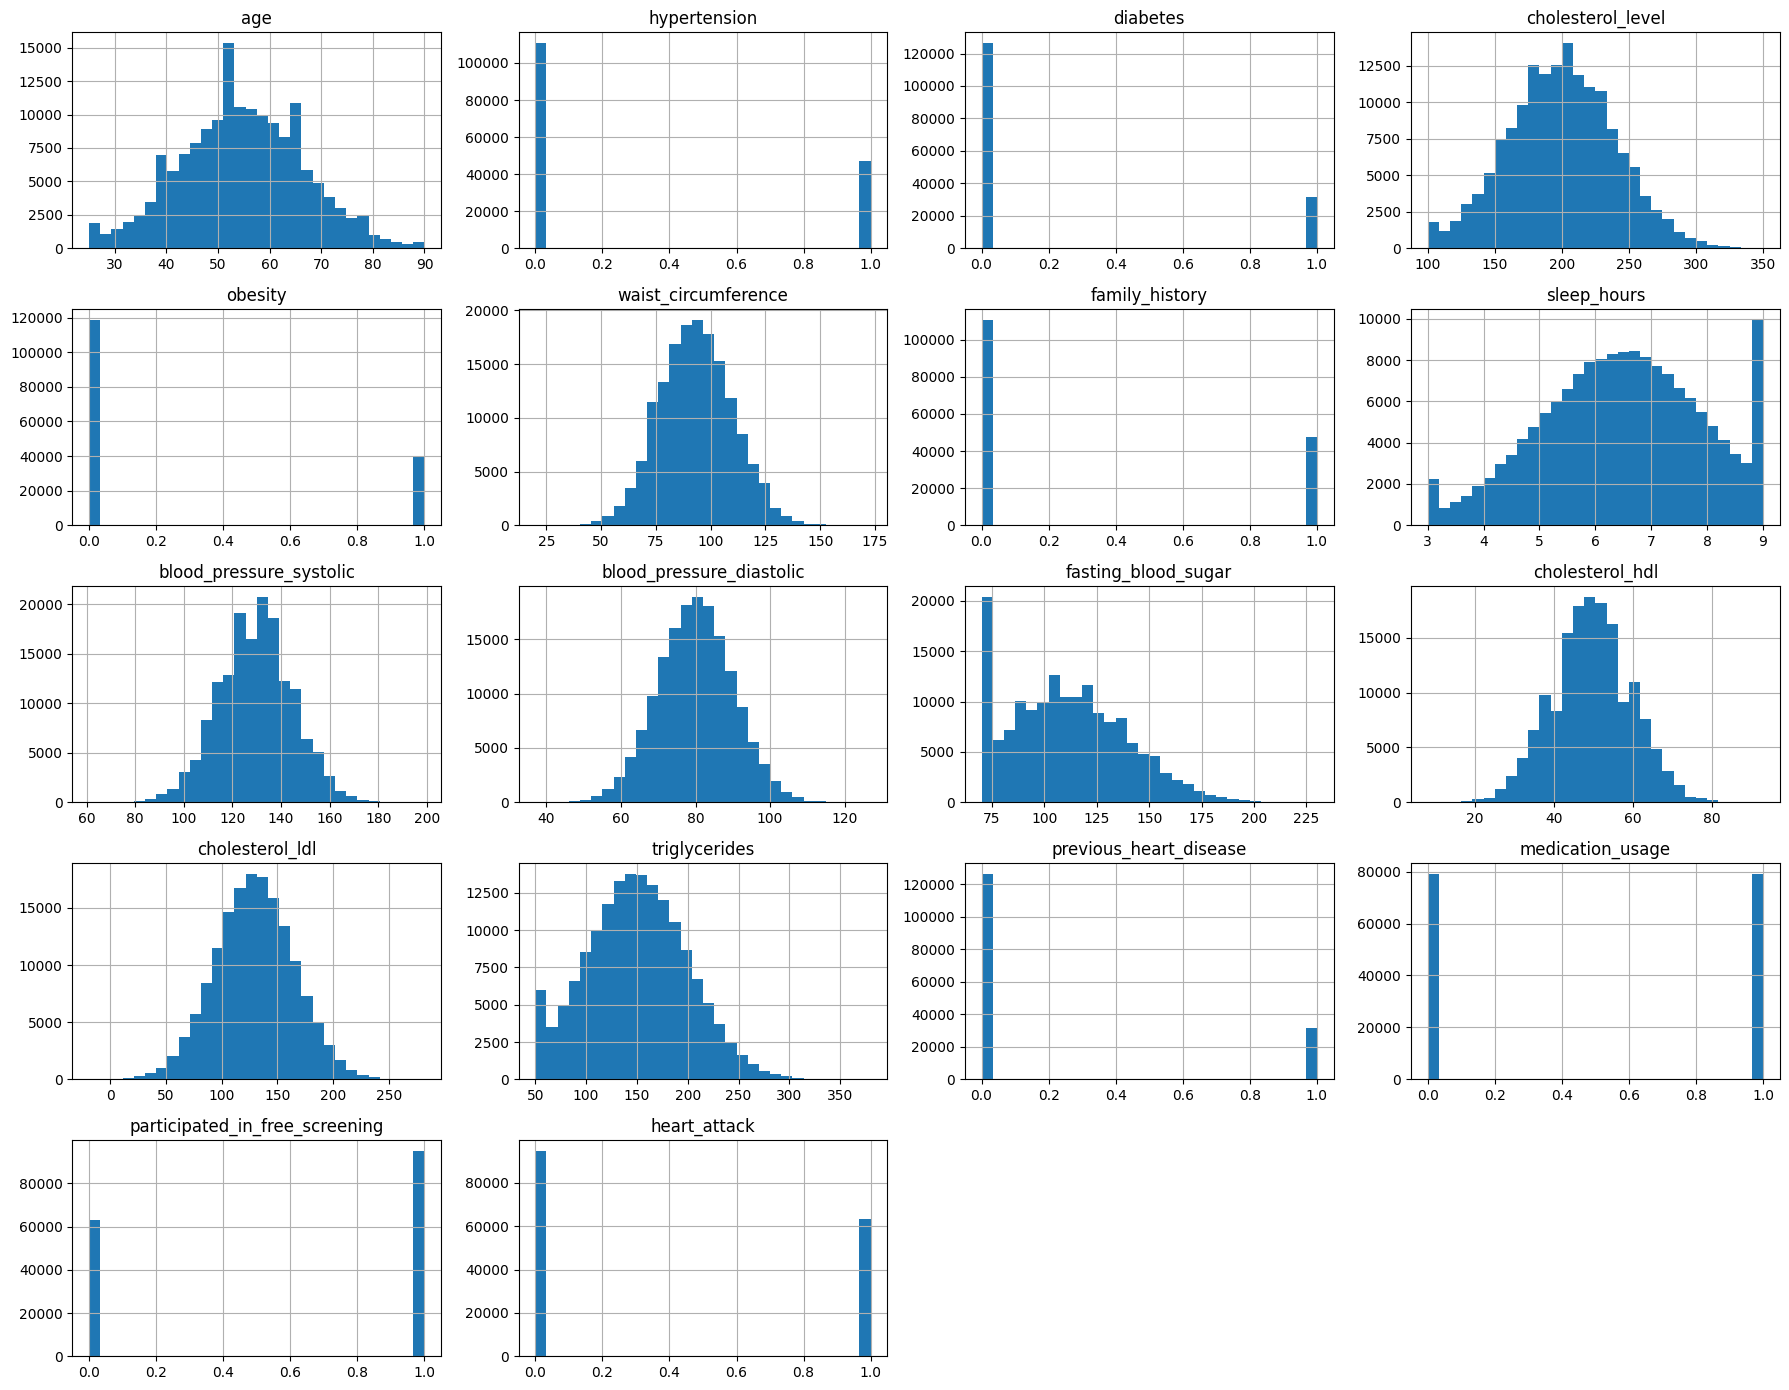


📌 Heart Attack Target Distribution:
   heart_attack  proportion
0             0    0.598996
1             1    0.401004

📌 Correlation Heatmap:


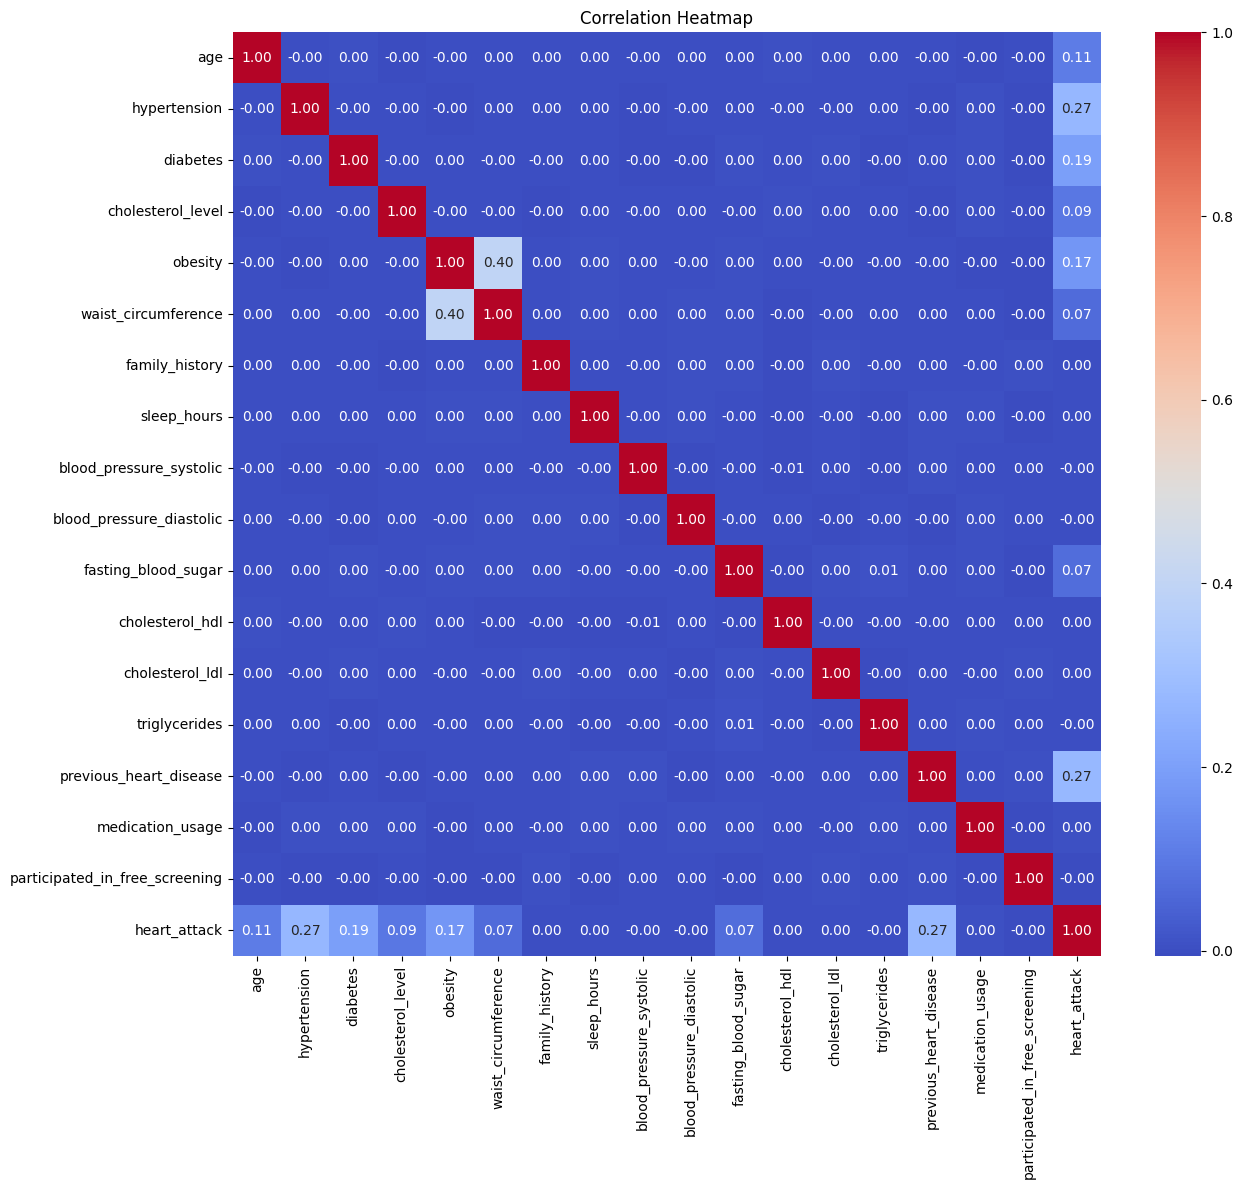

In [31]:
print("🔍 Dataset shape:", data.shape)

# 1. Missing values
print("\n📌 Missing Values Per Column:")
print(data.isnull().sum())

# 2. Data types & non-numeric columns
print("\n📌 Data Types:")
print(data.dtypes)

# 3. Quick look at unique values in some key categorical columns
categorical_cols = ['gender', 'region', 'alcohol_consumption', 'smoking_status',
                    'dietary_habits', 'physical_activity', 'medication_usage', 'heart_attack']

print("\n📌 Unique Values in Selected Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts(dropna=False))  # Keep NaNs in the count

# 4. Summary stats for numerical columns
print("\n📌 Statistical Summary (Numerical Columns):")
print(data.describe())

# 5. Histograms for numeric distributions
print("\n📊 Plotting histograms...")
data.hist(figsize=(18, 14), bins=30)
plt.tight_layout()
plt.show()

# 6. Target class balance
print("\n📌 Heart Attack Target Distribution:")
print(data['heart_attack'].value_counts(normalize=True).rename_axis('heart_attack').reset_index(name='proportion'))

# 7. Correlation heatmap (optional, to get quick idea of relationships)
print("\n📌 Correlation Heatmap:")
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlations with target
correlations = numeric_cols.corr()['heart_attack'].drop('heart_attack')

# Sort by absolute correlation
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Show top 10 most correlated features
print("🔍 Top 10 Features Most Correlated with 'heart_attack':")
print(correlations.loc[correlations_sorted.index[:10]])


🔍 Top 10 Features Most Correlated with 'heart_attack':
previous_heart_disease            0.274775
hypertension                      0.269261
diabetes                          0.194512
obesity                           0.171720
age                               0.105756
cholesterol_level                 0.092611
fasting_blood_sugar               0.069826
waist_circumference               0.067883
medication_usage                  0.004694
participated_in_free_screening   -0.003656
Name: heart_attack, dtype: float64


In [59]:
data['alcohol_consumption'] = data['alcohol_consumption'].fillna("zero")

In [34]:
print(data.isnull().sum())

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

In [60]:
data["alcohol_consumption"].head()

,alcohol_consumption
0,zero
1,zero
2,Moderate
3,Moderate
4,Moderate


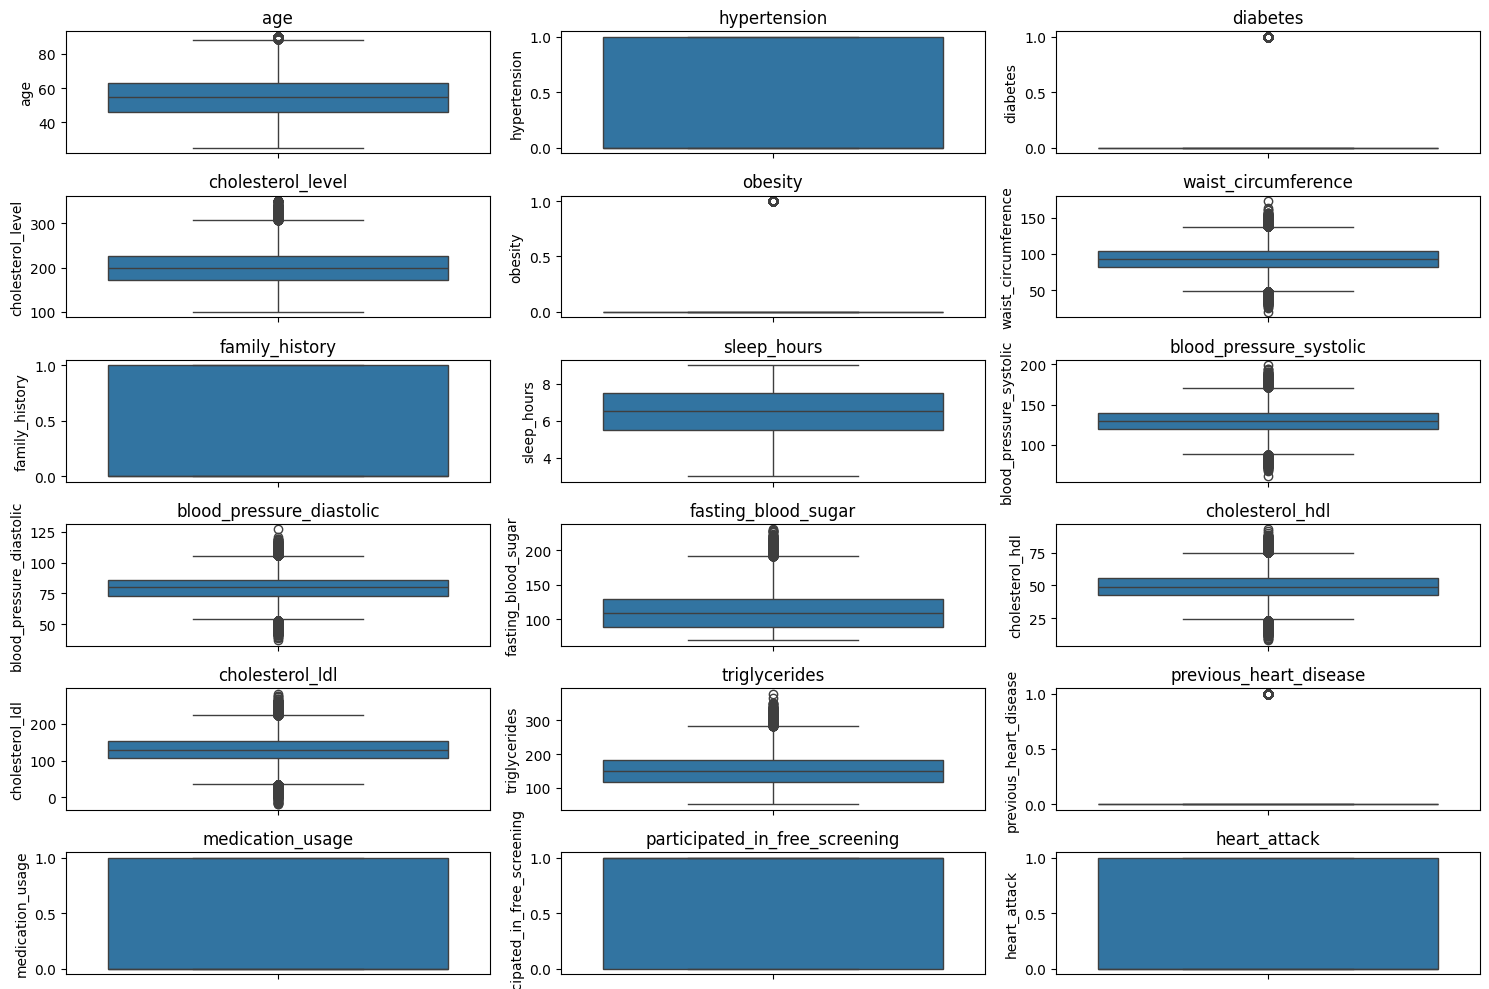

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)+2)//3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [62]:
from scipy import stats

# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores
z_scores = stats.zscore(data[numerical_cols])

# Find rows where *all* values are within acceptable Z-score range (less than 3)
filtered_entries = (abs(z_scores) < 3).all(axis=1)

# Apply the filter to remove outliers
data_cleaned = data[filtered_entries]

In [63]:
from scipy import stats

z_scores = stats.zscore(data_cleaned[numerical_cols])
outliers = (abs(z_scores) > 3)
outlier_counts = outliers.sum(axis=0)
rows_with_outliers = outliers.any(axis=1).sum()

print("Outlier counts per column:\n", outlier_counts)
print("\nTotal rows with at least one outlier:", rows_with_outliers)

Outlier counts per column:
 [  0   0   0  19   0  53   0   0 113   0  44   0  73  14   0   0   0   0]

Total rows with at least one outlier: 316


In [65]:
# i am handling outliers by removing the rows with at least one outlier in this code cell
from scipy import stats

# Start with your dataset
cleaned_data = data.copy()

# Iteratively remove rows with any Z-score > 3
while True:
    z_scores = stats.zscore(cleaned_data[numerical_cols])
    outliers = (abs(z_scores) > 3)
    mask = ~outliers.any(axis=1)

    if mask.sum() == len(cleaned_data):  # No more outliers
        break
    cleaned_data = cleaned_data[mask]

# Update your main dataset
data = cleaned_data.copy()

# Confirm
z_scores_check = stats.zscore(data[numerical_cols])
outliers_check = (abs(z_scores_check) > 3)
rows_with_outliers_remaining = outliers_check.any(axis=1).sum()

print("✅ Total rows with at least one outlier after iterative removal:", rows_with_outliers_remaining)

✅ Total rows with at least one outlier after iterative removal: 0


In [64]:
data = pd.get_dummies(data, columns=['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results'], drop_first=True)

In [66]:
# i am applying SMOTE to handle class imbalance in target variable - heart_attack, and checking if SMOTE worked or not in this code cell
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Split your original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 3: Train your model on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_sm, y_train_sm)

# Step 4: Predict and evaluate on the original test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77     18608
           1       0.77      0.73      0.75     18607

    accuracy                           0.76     37215
   macro avg       0.76      0.76      0.76     37215
weighted avg       0.76      0.76      0.76     37215



Best Parameters: {'C': 10, 'penalty': 'l2'}

Model Performance Metrics:
Accuracy: 0.7313
Precision: 0.6951
Recall: 0.5845
F1-Score: 0.6350
AUC-ROC: 0.8030

Confusion Matrix:
[[15428  3180]
 [ 5153  7248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18608
           1       0.70      0.58      0.63     12401

    accuracy                           0.73     31009
   macro avg       0.72      0.71      0.71     31009
weighted avg       0.73      0.73      0.73     31009



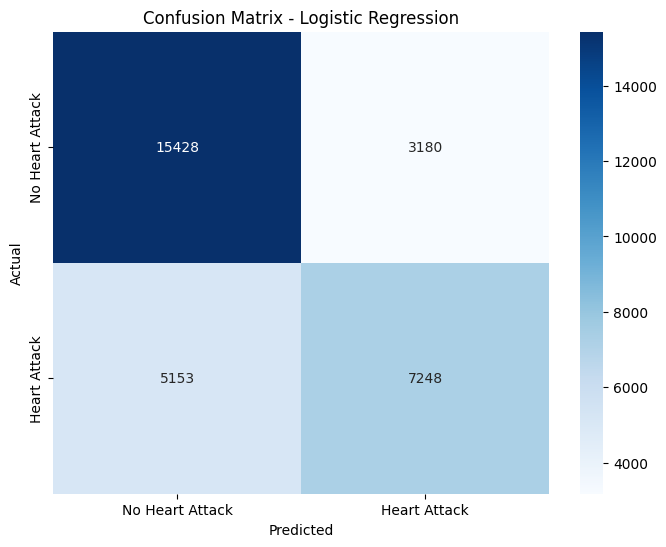

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your preprocessed DataFrame and 'heart_attack' is the target column

# Define features (X) and target (y)
X = data.drop('heart_attack', axis=1)
y = data['heart_attack']

# Split data into training and testing sets
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000) # Use 'liblinear' for smaller datasets or L1/L2 regularization

# Define a REDUCED parameter grid for Grid Search
# This grid has fewer combinations to speed up the search
param_grid = {
    'C': [0.1, 1, 10],  # Reduced number of C values
    'penalty': ['l2'] # Only using L2 regularization
}

# Initialize Grid Search with 5-fold Cross Validation
# cv=5 is kept as requested
# scoring='accuracy' is the metric used to evaluate each parameter combination
# n_jobs=-1 uses all available CPU cores for faster computation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using Grid Search on the training data
# This step performs the cross-validation for each parameter combination
grid_search.fit(X_train_sm, y_train_sm)

# Get the best model from Grid Search
# This is the model with the hyperparameters that performed best during cross-validation
best_log_reg = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_log_reg.predict(X_test)

# Get the probability of the positive class (heart attack = 1) for AUC calculation
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a detailed classification report
classification_rep = classification_report(y_test, y_pred)

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Print the model performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)

# Plot the Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model Performance Metrics (Decision Tree):
Accuracy: 0.7339
Precision: 0.7025
Recall: 0.5801
F1-Score: 0.6355
AUC-ROC: 0.8050

Confusion Matrix (Decision Tree):
[[15562  3046]
 [ 5207  7194]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     18608
           1       0.70      0.58      0.64     12401

    accuracy                           0.73     31009
   macro avg       0.73      0.71      0.71     31009
weighted avg       0.73      0.73      0.73     31009



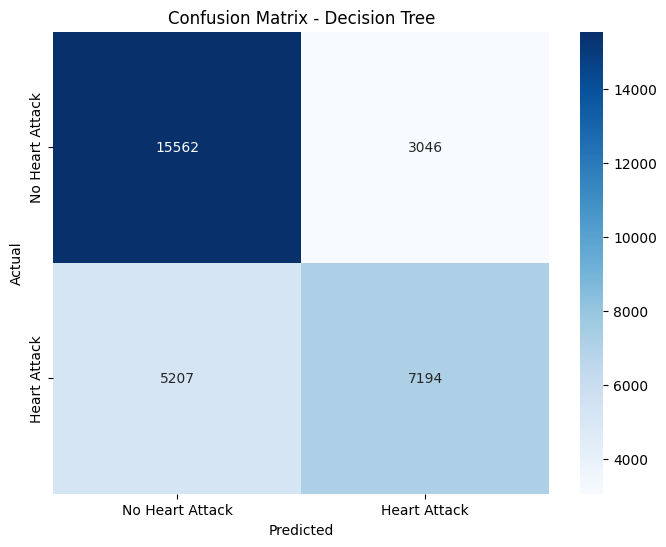

In [70]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
# Assuming 'data' is your preprocessed DataFrame and 'heart_attack' is the target column
# And X_train, X_test, y_train, y_test are already defined from the previous split

# Initialize Decision Tree Classifier model
# Setting a random_state for reproducibility
dt_clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid for Grid Search
# These are common hyperparameters for Decision Trees to tune
param_grid = {
    'max_depth': [None, 10, 20], # Maximum depth of the tree (None means no limit)
    'min_samples_split': [2, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4],     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini']   # Function to measure the quality of a split
}

# Initialize Grid Search with 5-fold Cross Validation
# cv=5 is kept as requested
# scoring='accuracy' is the metric used to evaluate each parameter combination
# n_jobs=-1 uses all available CPU cores for faster computation
grid_search_dt = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using Grid Search on the training data
grid_search_dt.fit(X_train_sm, y_train_sm)

# Get the best model from Grid Search
best_dt_clf = grid_search_dt.best_estimator_

# Make predictions on the test data using the best model
y_pred_dt = best_dt_clf.predict(X_test)

# Get the probability of the positive class for AUC calculation
y_pred_proba_dt = best_dt_clf.predict_proba(X_test)[:, 1]

# Evaluate the model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the best parameters
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)

# Print the performance metrics
print("\nModel Performance Metrics (Decision Tree):")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"AUC-ROC: {roc_auc_dt:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Print the classification report
print("\nClassification Report (Decision Tree):")
print(classification_rep_dt)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Best Parameters (Random Forest): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Model Performance Metrics (Random Forest):
Accuracy: 0.7369
Precision: 0.7322
Recall: 0.5392
F1-Score: 0.6210
AUC-ROC: 0.8141

Confusion Matrix (Random Forest):
[[16163  2445]
 [ 5715  6686]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     18608
           1       0.73      0.54      0.62     12401

    accuracy                           0.74     31009
   macro avg       0.74      0.70      0.71     31009
weighted avg       0.74      0.74      0.73     31009



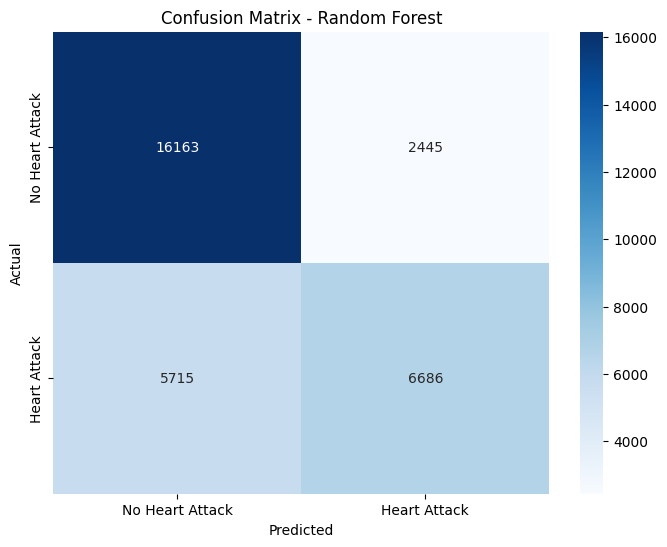

In [71]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your preprocessed DataFrame and 'heart_attack' is the target column
# And X_train, X_test, y_train, y_test are already defined from previous splits

# Initialize Random Forest Classifier model
# Setting a random_state for reproducibility
rf_clf = RandomForestClassifier(random_state=42)

# Define a REDUCED parameter grid for Grid Search
# Random Forests have several hyperparameters, so reducing the grid is crucial for speed
param_grid = {
    'n_estimators': [100], # Number of trees in the forest (reduced)
    'max_depth': [None, 10], # Maximum depth of the trees (reduced)
    'min_samples_split': [5], # Minimum number of samples required to split a node (reduced)
    'min_samples_leaf': [2], # Minimum number of samples required at each leaf node (reduced)
    'criterion': ['gini'] # Function to measure the quality of a split (keeping one for simplicity)
}

# Initialize Grid Search with 5-fold Cross Validation
# cv=5 is kept
# scoring='accuracy' is the metric used to evaluate each parameter combination
# n_jobs=-1 uses all available CPU cores for faster computation
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using Grid Search on the training data
grid_search_rf.fit(X_train_sm, y_train_sm)

# Get the best model from Grid Search
best_rf_clf = grid_search_rf.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf = best_rf_clf.predict(X_test)

# Get the probability of the positive class for AUC calculation
y_pred_proba_rf = best_rf_clf.predict_proba(X_test)[:, 1]

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the best parameters
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

# Print the performance metrics
print("\nModel Performance Metrics (Random Forest):")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Print the classification report
print("\nClassification Report (Random Forest):")
print(classification_rep_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Best Parameters (MLP): {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

Model Performance Metrics (MLP):
Accuracy: 0.7319
Precision: 0.6802
Recall: 0.6222
F1-Score: 0.6499
AUC-ROC: 0.8069

Confusion Matrix (MLP):
[[14981  3627]
 [ 4685  7716]]

Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     18608
           1       0.68      0.62      0.65     12401

    accuracy                           0.73     31009
   macro avg       0.72      0.71      0.72     31009
weighted avg       0.73      0.73      0.73     31009



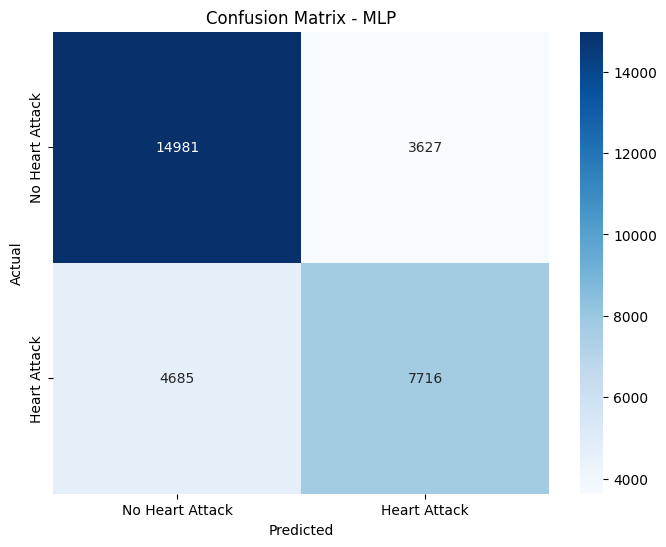

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler # MLP often benefits from scaling
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your preprocessed DataFrame and 'heart_attack' is the target column
# And X_train, X_test, y_train, y_test are already defined from previous splits

# --- Data Scaling (Crucial for MLP) ---
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP Classifier model
# Setting a random_state for reproducibility
# max_iter is set to a reasonably high number to allow convergence
# early_stopping can be useful to prevent overfitting and speed up
mlp_clf = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True)

# Define a parameter grid for Grid Search
# Tuning MLP hyperparameters can be complex and time-consuming
param_grid = {
    'hidden_layer_sizes': [(100,)], # Only one option for hidden layers
    'activation': ['relu'],                 # Only using 'relu' activation
    'solver': ['adam'],                             # Only using 'adam' solver
    'alpha': [0.0001],                       # Only one value for alpha
    'learning_rate': ['constant']       # Only using 'constant' learning rate
}

# Initialize Grid Search with 5-fold Cross Validation
# cv=5 is kept
# scoring='accuracy' is the metric used to evaluate each parameter combination
# n_jobs=-1 uses all available CPU cores for faster computation
grid_search_mlp = GridSearchCV(mlp_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model using Grid Search on the SCALED training data
grid_search_mlp.fit(X_train_scaled, y_train_sm)

# Get the best model from Grid Search
best_mlp_clf = grid_search_mlp.best_estimator_

# Make predictions on the SCALED test data using the best model
y_pred_mlp = best_mlp_clf.predict(X_test_scaled)

# Get the probability of the positive class for AUC calculation
y_pred_proba_mlp = best_mlp_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Print the best parameters
print("Best Parameters (MLP):", grid_search_mlp.best_params_)

# Print the performance metrics
print("\nModel Performance Metrics (MLP):")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")
print(f"AUC-ROC: {roc_auc_mlp:.4f}")

# Print the confusion matrix
print("\nConfusion Matrix (MLP):")
print(conf_matrix_mlp)

# Print the classification report
print("\nClassification Report (MLP):")
print(classification_rep_mlp)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

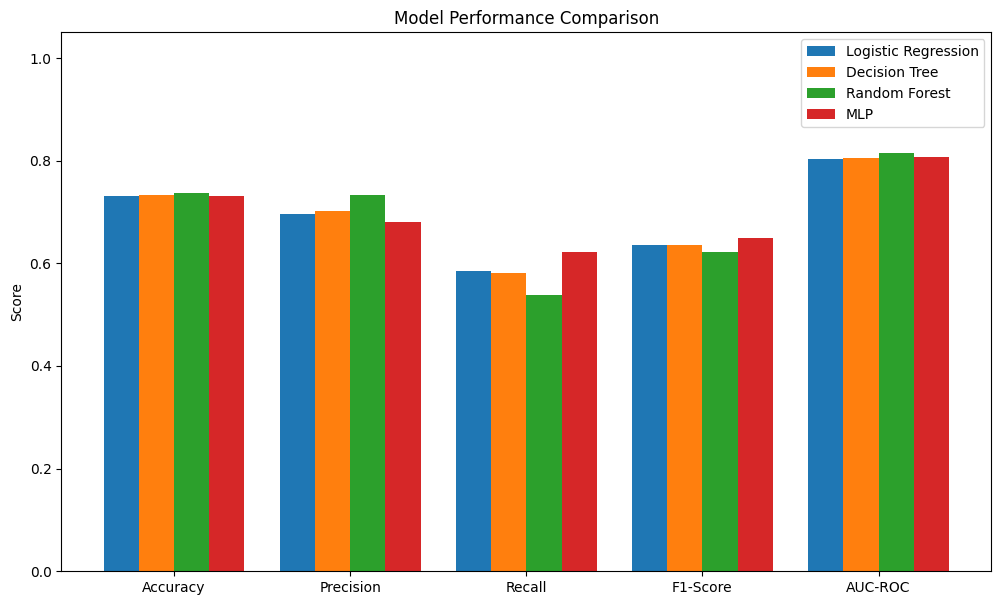

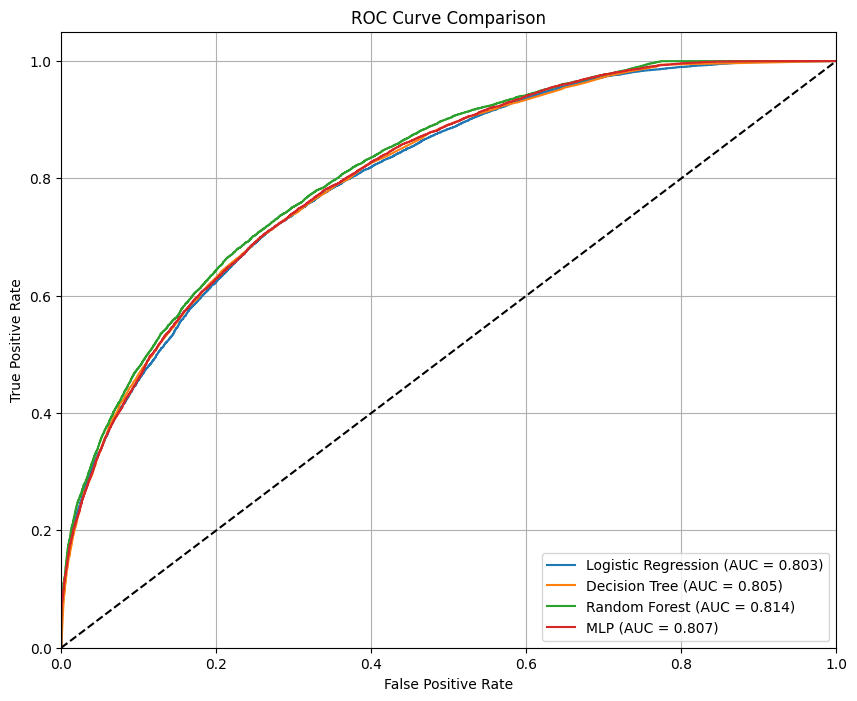

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have these variables defined from your previous code:
# Logistic Regression: accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr, y_pred_proba_lr
# Decision Tree: accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt, y_pred_proba_dt
# Random Forest: accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf, y_pred_proba_rf
# MLP: accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp, y_pred_proba_mlp

# Create a dictionary for easy handling
metrics = {
    "Logistic Regression": [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr],
    "Decision Tree": [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    "MLP": [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp]
}

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Plot bar chart for metrics comparison
plt.figure(figsize=(12, 7))
bar_width = 0.2
x = range(len(metric_names))

for i, (model_name, values) in enumerate(metrics.items()):
    plt.bar([p + bar_width*i for p in x], values, width=bar_width, label=model_name)

plt.xticks([p + 1.5*bar_width for p in x], metric_names)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

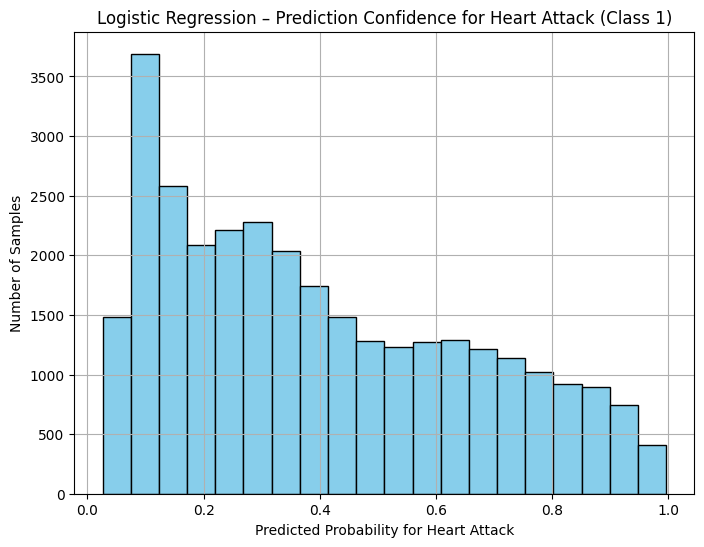

Average Confidence for Heart Attack Predictions (Class 1): 0.3993


In [81]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black')
plt.title('Logistic Regression – Prediction Confidence for Heart Attack (Class 1)')
plt.xlabel('Predicted Probability for Heart Attack')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

import numpy as np

# Average confidence for predicting heart attack (class 1)
avg_confidence_class1 = np.mean(y_pred_proba)
print(f"Average Confidence for Heart Attack Predictions (Class 1): {avg_confidence_class1:.4f}")

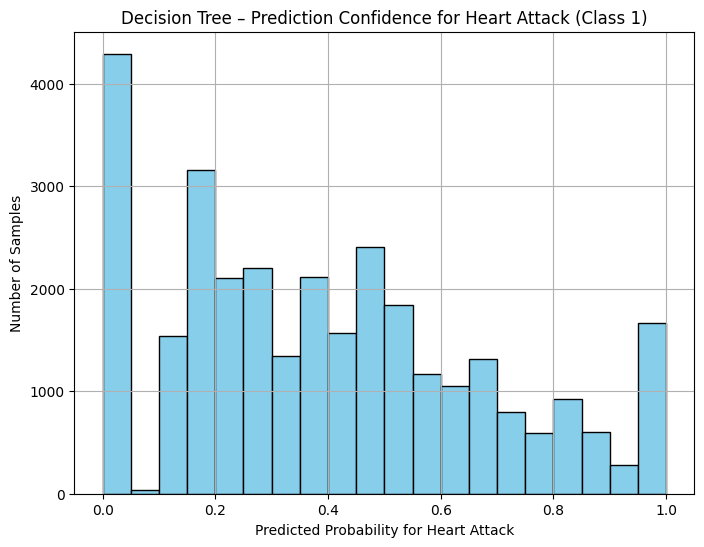

Average Confidence for Heart Attack Predictions (Class 1): 0.3976


In [82]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba_dt, bins=20, color='skyblue', edgecolor='black')
plt.title('Decision Tree – Prediction Confidence for Heart Attack (Class 1)')
plt.xlabel('Predicted Probability for Heart Attack')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

import numpy as np

# Average confidence for predicting heart attack (class 1)
avg_confidence_class1 = np.mean(y_pred_proba_dt)
print(f"Average Confidence for Heart Attack Predictions (Class 1): {avg_confidence_class1:.4f}")

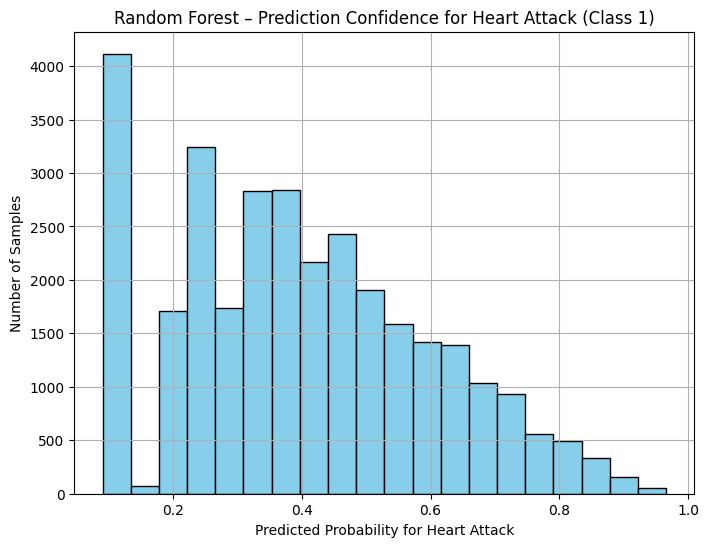

Average Confidence for Heart Attack Predictions (Class 1): 0.3993


In [83]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba_rf, bins=20, color='skyblue', edgecolor='black')
plt.title('Random Forest – Prediction Confidence for Heart Attack (Class 1)')
plt.xlabel('Predicted Probability for Heart Attack')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

import numpy as np

# Average confidence for predicting heart attack (class 1)
avg_confidence_class1 = np.mean(y_pred_proba_rf)
print(f"Average Confidence for Heart Attack Predictions (Class 1): {avg_confidence_class1:.4f}")

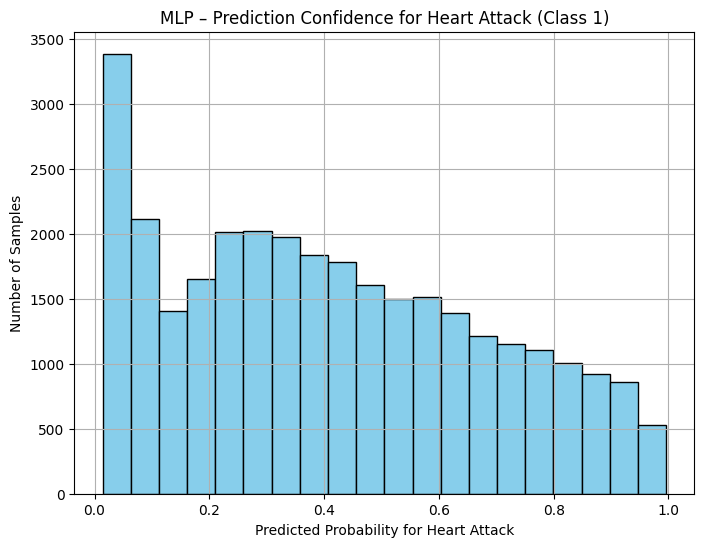

Average Confidence for Heart Attack Predictions (Class 1): 0.4119


In [84]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba_mlp, bins=20, color='skyblue', edgecolor='black')
plt.title('MLP – Prediction Confidence for Heart Attack (Class 1)')
plt.xlabel('Predicted Probability for Heart Attack')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()

import numpy as np

# Average confidence for predicting heart attack (class 1)
avg_confidence_class1 = np.mean(y_pred_proba_mlp)
print(f"Average Confidence for Heart Attack Predictions (Class 1): {avg_confidence_class1:.4f}")

In [86]:
# --- Feature Importance: Coefficients for Logistic Regression ---
import numpy as np
import pandas as pd

coefficients = best_log_reg.coef_[0]  # Coefficients for each feature
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})

# Sort by absolute value of coefficients
coef_df['Abs Coef'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs Coef', ascending=False)

print("\nLogistic Regression Feature Importance (Top Features):")
print(coef_df[['Feature', 'Coefficient', 'Odds Ratio']].head(10))


Logistic Regression Feature Importance (Top Features):
                         Feature  Coefficient  Odds Ratio
14        previous_heart_disease     1.801178    6.056781
1                   hypertension     1.553969    4.730207
2                       diabetes     1.297521    3.660213
22           smoking_status_Past    -1.099689    0.332975
4                        obesity     1.076215    2.933555
21          smoking_status_Never    -1.074826    0.341357
24      alcohol_consumption_zero    -0.061060    0.940767
23  alcohol_consumption_Moderate    -0.046438    0.954624
25         physical_activity_Low    -0.034981    0.965624
27      dietary_habits_Unhealthy    -0.034168    0.966409



Feature Importance (Decision Tree):
                   Feature  Importance
14  previous_heart_disease    0.232616
1             hypertension    0.229058
2                 diabetes    0.120371
4                  obesity    0.093124
3        cholesterol_level    0.069769
0                      age    0.066175
22     smoking_status_Past    0.057256
10     fasting_blood_sugar    0.043932
21    smoking_status_Never    0.035269
7              sleep_hours    0.008894


<ipython-input-87-a7ac18473ae2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(10), palette='viridis')


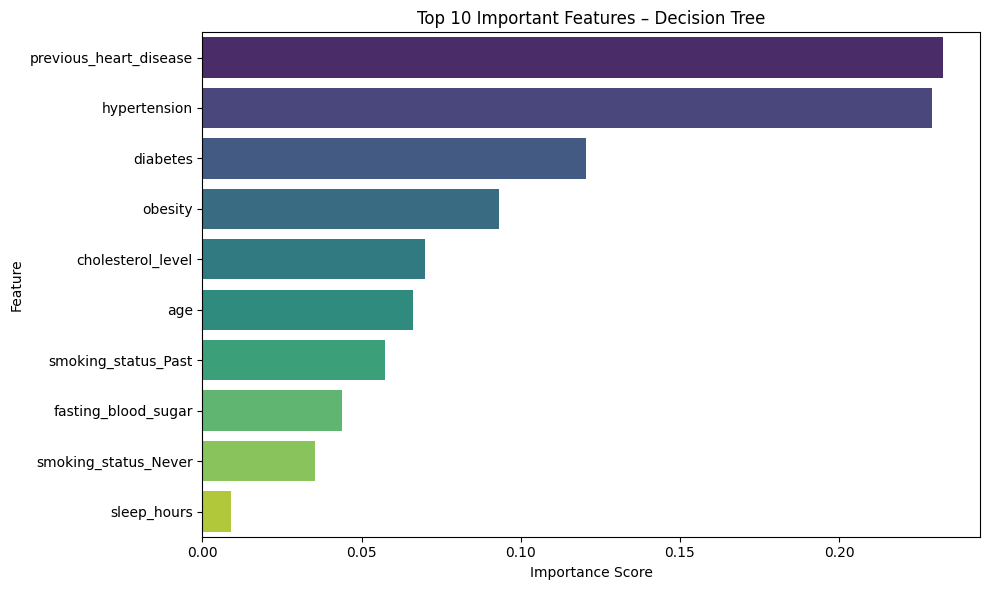

In [87]:
# --- Feature Importance for Decision Tree ---
import pandas as pd

feature_importances_dt = best_dt_clf.feature_importances_
feature_names = X.columns

dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_dt
})

# Sort by importance
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(dt_importance_df.head(10))

# Optional: Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features – Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Feature ranking (Random Forest):
previous_heart_disease: 0.2466
hypertension: 0.2349
diabetes: 0.1166
obesity: 0.0879
cholesterol_level: 0.0630
age: 0.0614
fasting_blood_sugar: 0.0383
smoking_status_Never: 0.0352
smoking_status_Past: 0.0249
waist_circumference: 0.0145
sleep_hours: 0.0107
cholesterol_ldl: 0.0104
triglycerides: 0.0101
blood_pressure_systolic: 0.0093
blood_pressure_diastolic: 0.0087
cholesterol_hdl: 0.0083
medication_usage: 0.0012
family_history: 0.0012
gender_Male: 0.0012
dietary_habits_Unhealthy: 0.0012
region_Urban: 0.0012
income_level_Middle: 0.0012
participated_in_free_screening: 0.0012
stress_level_Moderate: 0.0011
air_pollution_exposure_Moderate: 0.0011
physical_activity_Moderate: 0.0011
income_level_Low: 0.0011
stress_level_Low: 0.0011
physical_activity_Low: 0.0010
EKG_results_Normal: 0.0010
alcohol_consumption_Moderate: 0.0010
air_pollution_exposure_Low: 0.0010
alcohol_consumption_zero: 0.0010


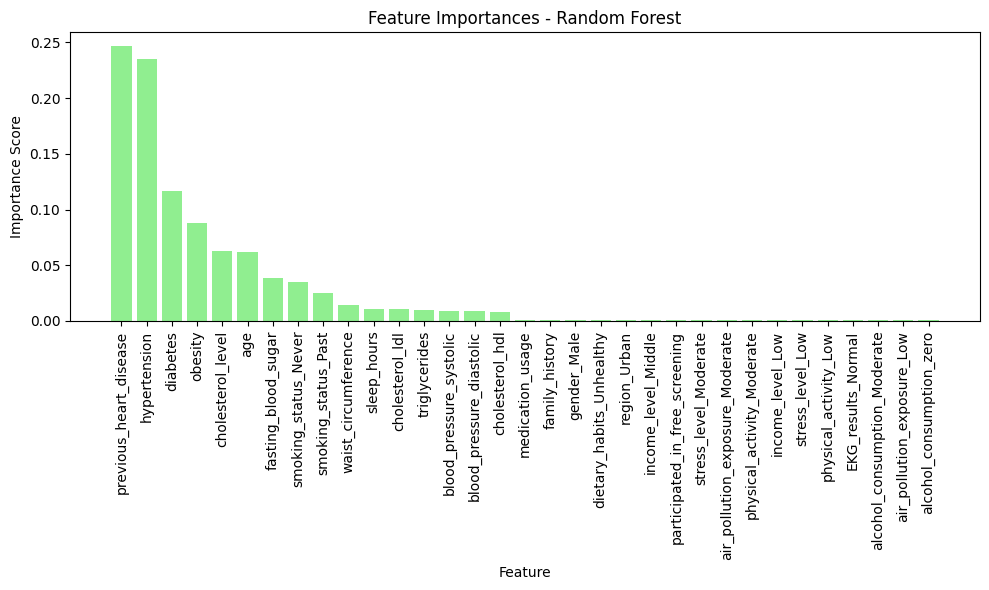

In [88]:
# Get feature importance scores from the trained Random Forest
importances_rf = best_rf_clf.feature_importances_

# Sort the features by importance (descending order)
indices_rf = importances_rf.argsort()[::-1]

# Print the feature ranking
print("Feature ranking (Random Forest):")
for i in indices_rf:
    print(f"{X.columns[i]}: {importances_rf[i]:.4f}")

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances_rf)), importances_rf[indices_rf], color="lightgreen", align="center")
plt.xticks(range(len(importances_rf)), X.columns[indices_rf], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

SHAP values shape: (50, 33, 2)


<ipython-input-100-fb03427fc9ff>:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:, :, 1], test_samples, feature_names=X_train_sm.columns)


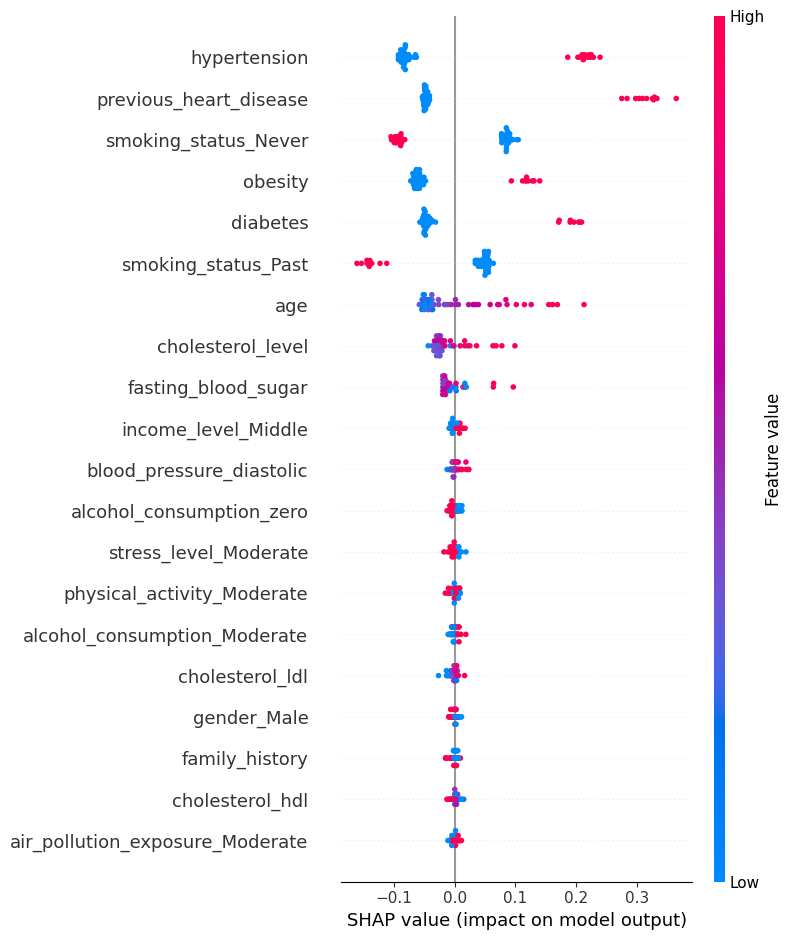

In [100]:
import shap
import numpy as np

# background and test data as before
background = X_train_scaled[:100]
test_samples = X_test_scaled[:50]

# Define a wrapper function that returns predict_proba output
def model_predict_proba(X):
    return best_mlp_clf.predict_proba(X)

# Create SHAP explainer with this wrapper function and background data
explainer = shap.Explainer(model_predict_proba, background, feature_names=X_train_sm.columns)

# Get SHAP values for test data
shap_values = explainer(test_samples)

# SHAP values shape: (samples, features, classes)
print("SHAP values shape:", shap_values.values.shape)

# Plot summary plot for the positive class (index 1), with feature names
shap.summary_plot(shap_values.values[:, :, 1], test_samples, feature_names=X_train_sm.columns)